In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict,validation_curve
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [22]:
test_df = pd.read_csv('../content/test.csv')
train_df = pd.read_csv('../content/train.csv')

In [53]:
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))


Shape Train:	(7352, 563)
Shape Test:	(2947, 563)



In [49]:
both_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1


In [7]:
# Create a subset of the dataset to speed up the modeling
both_df_s=both_df.drop(both_df.index[500:])

In [8]:
# Confirm the size of the dataset
both_df_s.shape

(500, 563)

In [25]:
# Create a label
label = both_df.pop('Activity')

In [26]:
# Create a table with the colomn name and its occurance
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df_s.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyGyro,79
fBodyAcc,79
fBodyAccJerk,79
tBodyAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tGravityAcc,40
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13


In [11]:
# Dataset description with its stats
both_df_s.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.267481,-0.016837,-0.106280,-0.581390,-0.416733,-0.563485,-0.613848,-0.434239,-0.551985,-0.420504,...,0.167705,-0.301652,-0.606297,0.034773,0.011066,0.018333,-0.004681,-0.521624,0.103438,-0.046032
std,0.079501,0.048949,0.068655,0.394847,0.496553,0.375476,0.366464,0.480129,0.388320,0.512347,...,0.236020,0.353296,0.355753,0.337002,0.455837,0.598458,0.462761,0.432225,0.321721,0.202634
min,-0.361205,-0.684097,-1.000000,-0.999255,-0.998359,-0.999454,-0.999407,-0.998077,-0.999808,-0.971348,...,-0.800684,-0.944282,-0.999595,-0.939598,-0.964760,-0.992886,-0.994877,-0.884970,-0.817761,-0.980143
25%,0.258182,-0.024061,-0.122607,-0.994170,-0.975457,-0.983273,-0.994801,-0.975219,-0.983019,-0.936775,...,0.041993,-0.543871,-0.846753,-0.121352,-0.300479,-0.455472,-0.365103,-0.753172,0.018419,-0.132859
50%,0.276985,-0.017151,-0.108446,-0.440835,-0.192795,-0.442747,-0.491315,-0.206259,-0.438425,-0.256124,...,0.169814,-0.349255,-0.713482,0.013240,0.015974,0.034384,-0.010991,-0.697063,0.262193,0.040417
75%,0.288643,-0.008838,-0.092884,-0.281302,0.043264,-0.245435,-0.334787,0.009852,-0.238134,-0.066366,...,0.293097,-0.116397,-0.481961,0.192432,0.332842,0.499177,0.344863,-0.614989,0.294547,0.089045
max,0.469946,0.324130,0.346658,0.389135,0.532506,0.083796,0.257325,0.502260,0.195960,0.680338,...,0.918576,0.989538,0.956845,0.955207,0.990995,0.992677,0.941894,0.799174,0.367923,0.265795


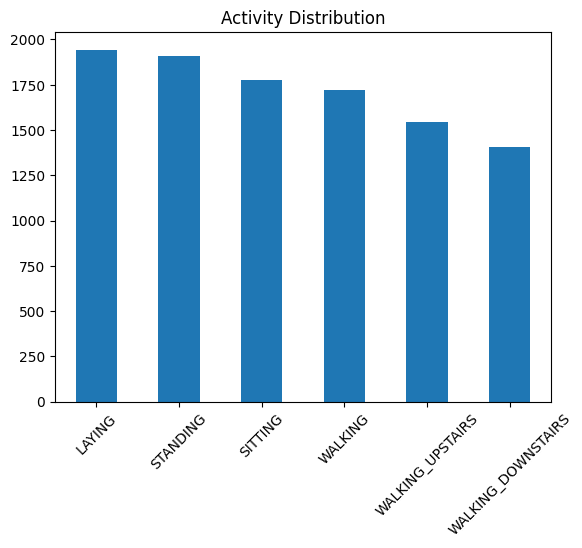

In [27]:
label.value_counts().plot(kind='bar')
plt.title('Activity Distribution')
plt.xticks(rotation = 45)
plt.show()


In [28]:
# Creating a dataset that contain time series of the data
clean_df=both_df[['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','tGravityAcc-mean()-X','tGravityAcc-mean()-Y','tGravityAcc-mean()-Z','tBodyAccJerk-mean()-X','tBodyAccJerk-mean()-Y','tBodyAccJerk-mean()-Z','tBodyGyroJerk-mean()-X','tBodyGyroJerk-mean()-Y','tBodyGyroJerk-mean()-Z']]

In [29]:
X=clean_df

In [30]:
# Create a mapping of activity to a numeric value
dict_map = {'LAYING':1 , 'STANDING': 2, 'SITTING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}
y = label.map(dict_map)

In [31]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [32]:
# Create a visualization function using TSNE to reduce the dimenionality
from sklearn.manifold import TSNE

def perform_tsne(x_train, y_train, perplexities, n_iter=1000):
    for index, per in enumerate (perplexities):
      X_reduced =TSNE(verbose=1, perplexity=per).fit_transform(x_train)
      df = pd.DataFrame({'x': X_reduced[:,0], 'y': X_reduced[:,1], 'label': y_train})
      print("Creating plot for TSNE visualization..")
      plt.figure(figsize=(7,7))
      sns.scatterplot(data=df, x='x', y='y', hue=y_train, palette="Set1")
      plt.title(f"Perplexity : {per} and max_iter: {n_iter}")
      plt.show()

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.022s...
[t-SNE] Computed neighbors for 8239 samples in 0.924s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 0.008195
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.338379
[t-SNE] KL divergence after 1000 iterations: 1.667795
Creating plot for TSNE visualization..


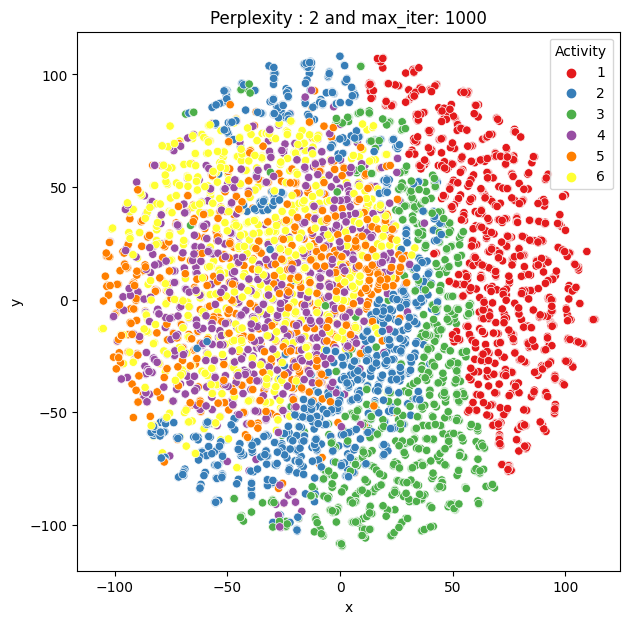

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.024s...
[t-SNE] Computed neighbors for 8239 samples in 1.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 0.016704
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.122002
[t-SNE] KL divergence after 1000 iterations: 1.627033
Creating plot for TSNE visualization..


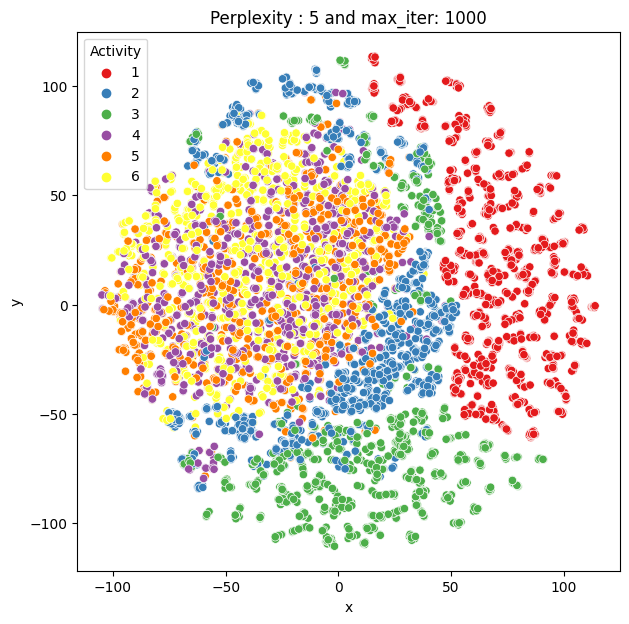

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.021s...
[t-SNE] Computed neighbors for 8239 samples in 1.393s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 0.025788
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.117264
[t-SNE] KL divergence after 1000 iterations: 1.570437
Creating plot for TSNE visualization..


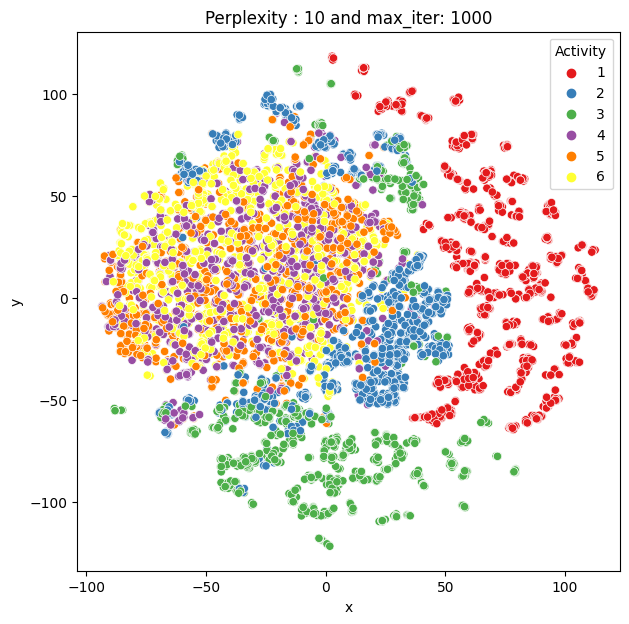

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.024s...
[t-SNE] Computed neighbors for 8239 samples in 1.428s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 0.036547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.061539
[t-SNE] KL divergence after 1000 iterations: 1.513366
Creating plot for TSNE visualization..


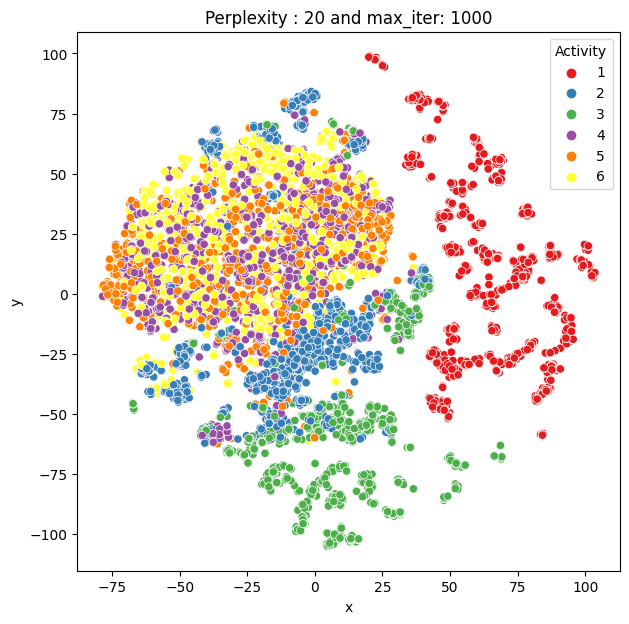

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.024s...
[t-SNE] Computed neighbors for 8239 samples in 1.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 0.053637
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.426178
[t-SNE] KL divergence after 1000 iterations: 1.389618
Creating plot for TSNE visualization..


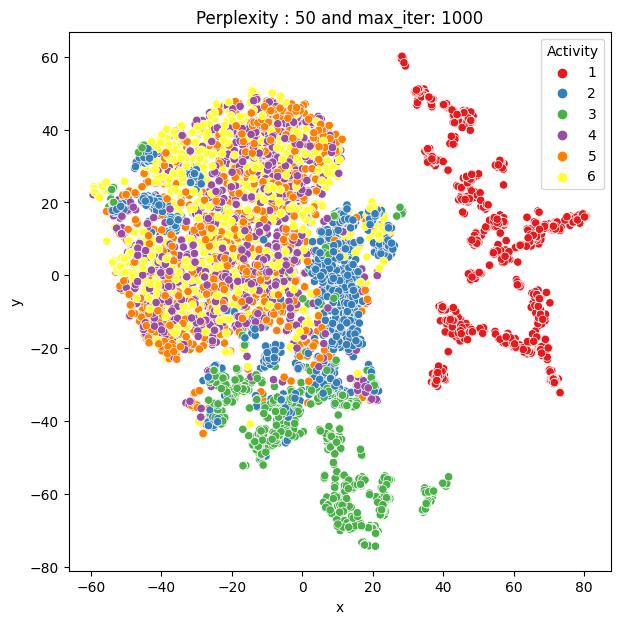

In [33]:
perform_tsne(X_train, y_train, perplexities=[2, 5, 10, 20, 50])

In [35]:
# Using PCA transform with PCA = 2

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

pca.score(X_test)

4.847451395474838

In [40]:
# Plot PCA visualization with PCA = 2

import plotly.express as px
fig = px.scatter(X_train_pca,x=X_train_pca[:, 0], y=X_train_pca[:, 1],color=y_train)
fig.update_layout(scene = dict(
    xaxis_title="First PCA",
    yaxis_title="Second PCA"),
    title="PCA visualization of Sensor Dataset"
)

fig.show()

In [38]:
# Using PCA transform with PCA = 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

pca.score(X_test)

5.152076237380636

In [39]:
# Plot PCA visualization with PCA = 3

import plotly.express as px
fig = px.scatter_3d(X_train_pca,x=X_train_pca[:, 0], y=X_train_pca[:, 1], z=X_train_pca[:, 2],color=y_train)
fig.update_layout(scene = dict(
    xaxis_title="First PCA",
    yaxis_title="Second PCA",
    zaxis_title="Third PCA"),
    title="PCA visualization of Sensor Dataset"
)

fig.show()

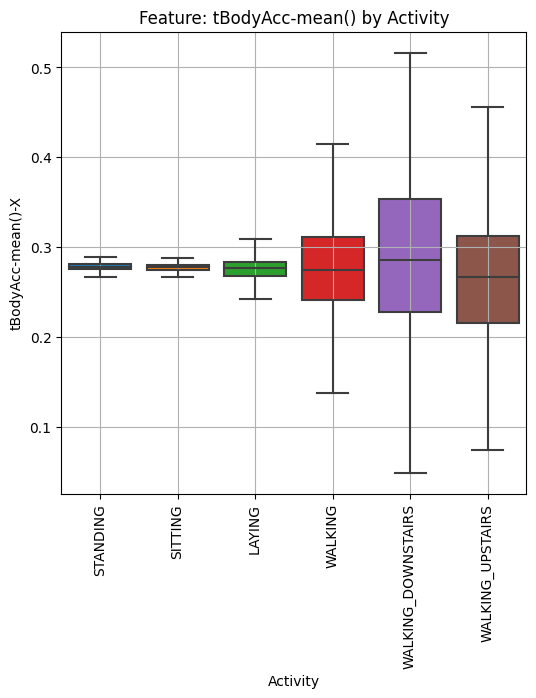

In [56]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Activity", y='tBodyAcc-mean()-X', data=both_df, showfliers=False, saturation=1)
plt.title("Feature: tBodyAcc-mean() by Activity")
plt.xticks(rotation=90)
plt.grid()
plt.show()

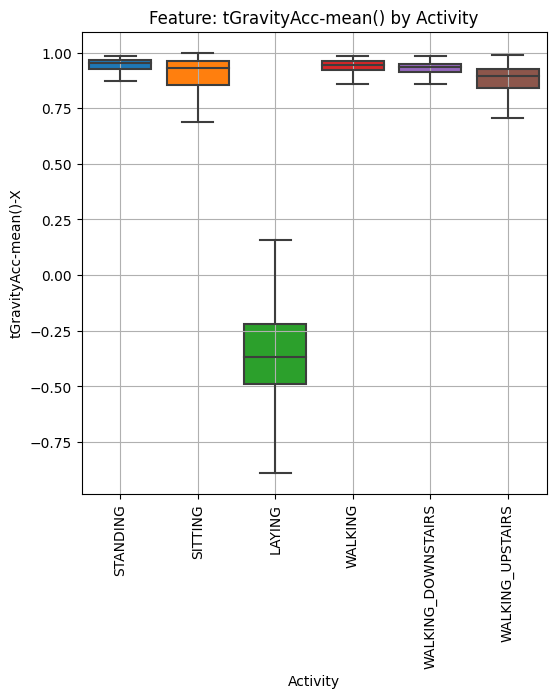

In [54]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Activity", y='tGravityAcc-mean()-X', data=both_df, showfliers=False, saturation=1)
plt.title("Feature: tGravityAcc-mean() by Activity")
plt.xticks(rotation=90)
plt.grid()
plt.show()

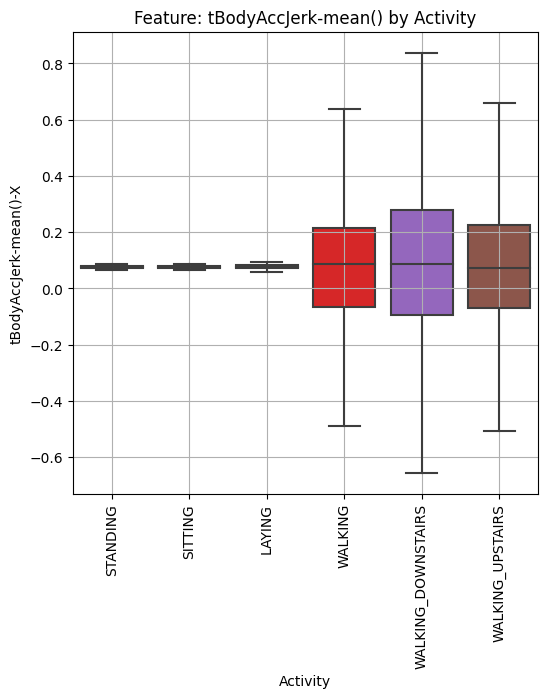

In [58]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Activity", y='tBodyAccJerk-mean()-X', data=both_df, showfliers=False, saturation=1)
plt.title("Feature: tBodyAccJerk-mean() by Activity")
plt.xticks(rotation=90)
plt.grid()
plt.show()


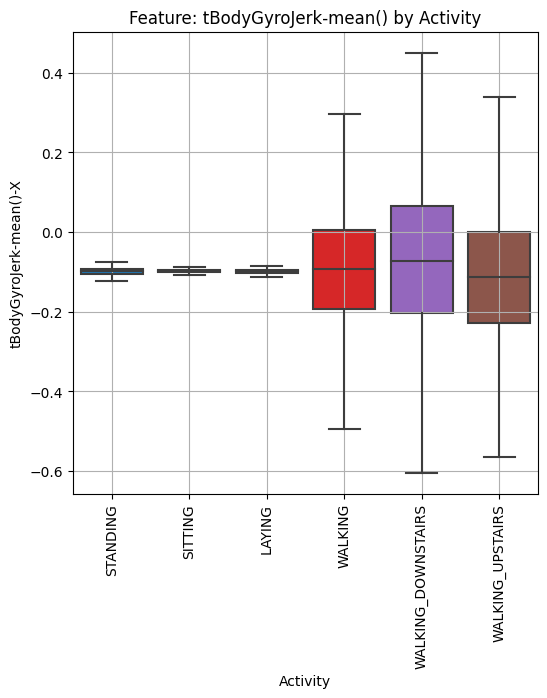

In [61]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Activity", y='tBodyGyroJerk-mean()-X', data=both_df, showfliers=False, saturation=1)
plt.title("Feature: tBodyGyroJerk-mean() by Activity")
plt.xticks(rotation=90)
plt.grid()
plt.show()

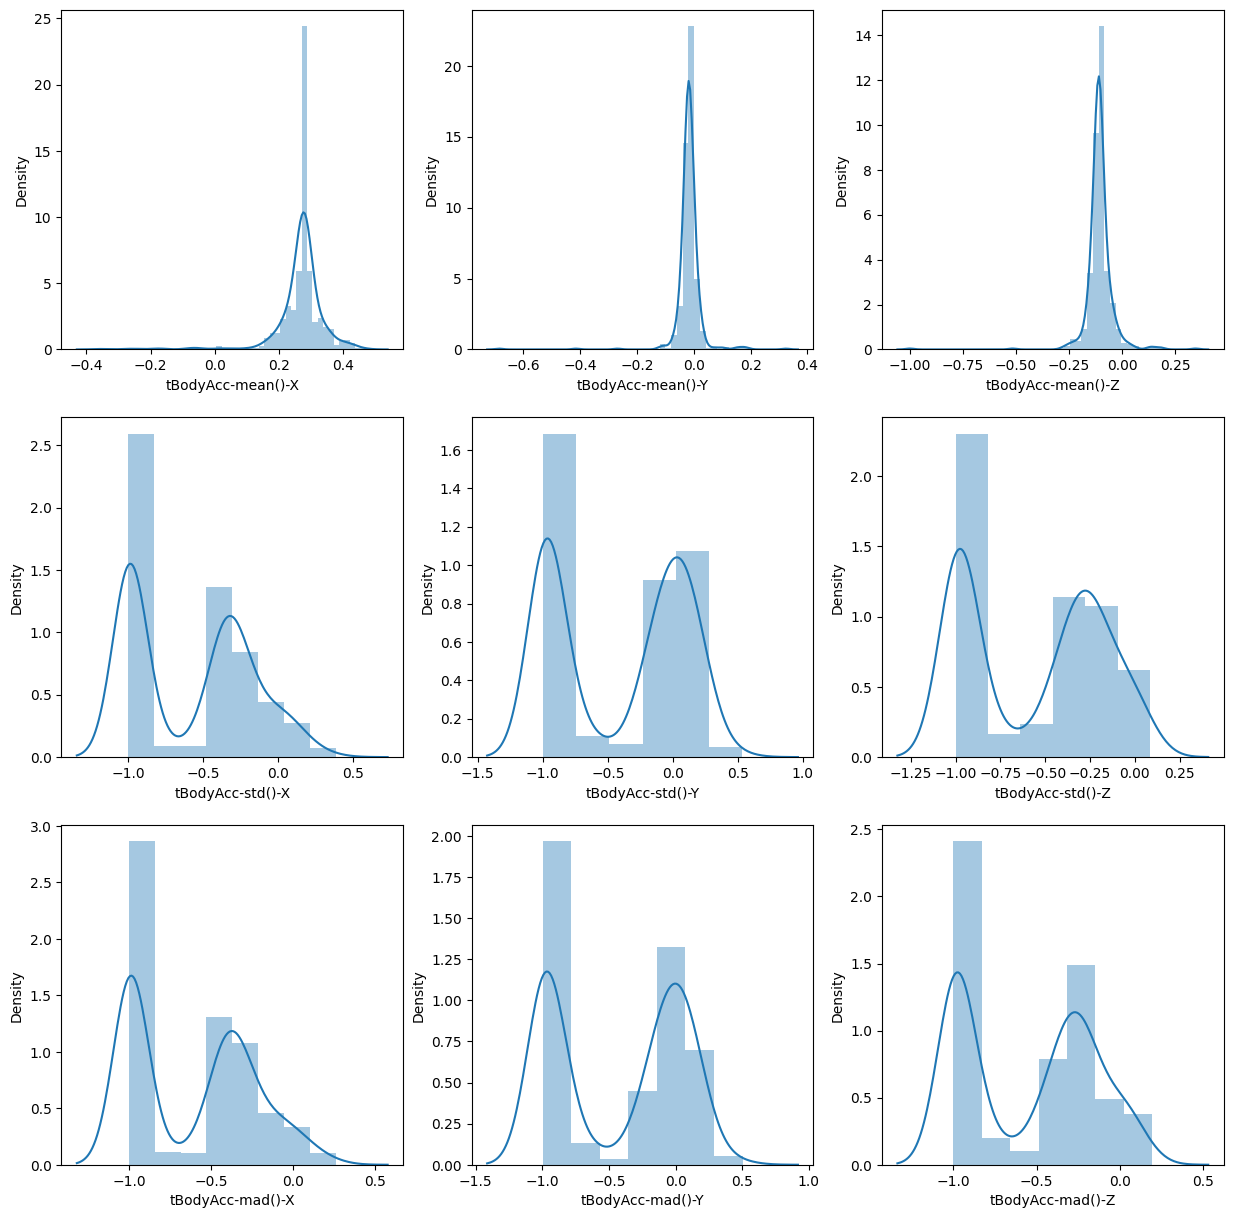

In [41]:
# Create distriubtion plot
def plot_distribution(data, col):
    fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
    for i, ax in zip(range(9), axes.flat):
        sns.distplot(both_df_s[cols[i]], ax = ax)
    plt.show()

# Select body acceleration attributes for  time series data of X, Y, Z axis data
cols = both_df_s.columns[:9]
plot_distribution(both_df, cols)

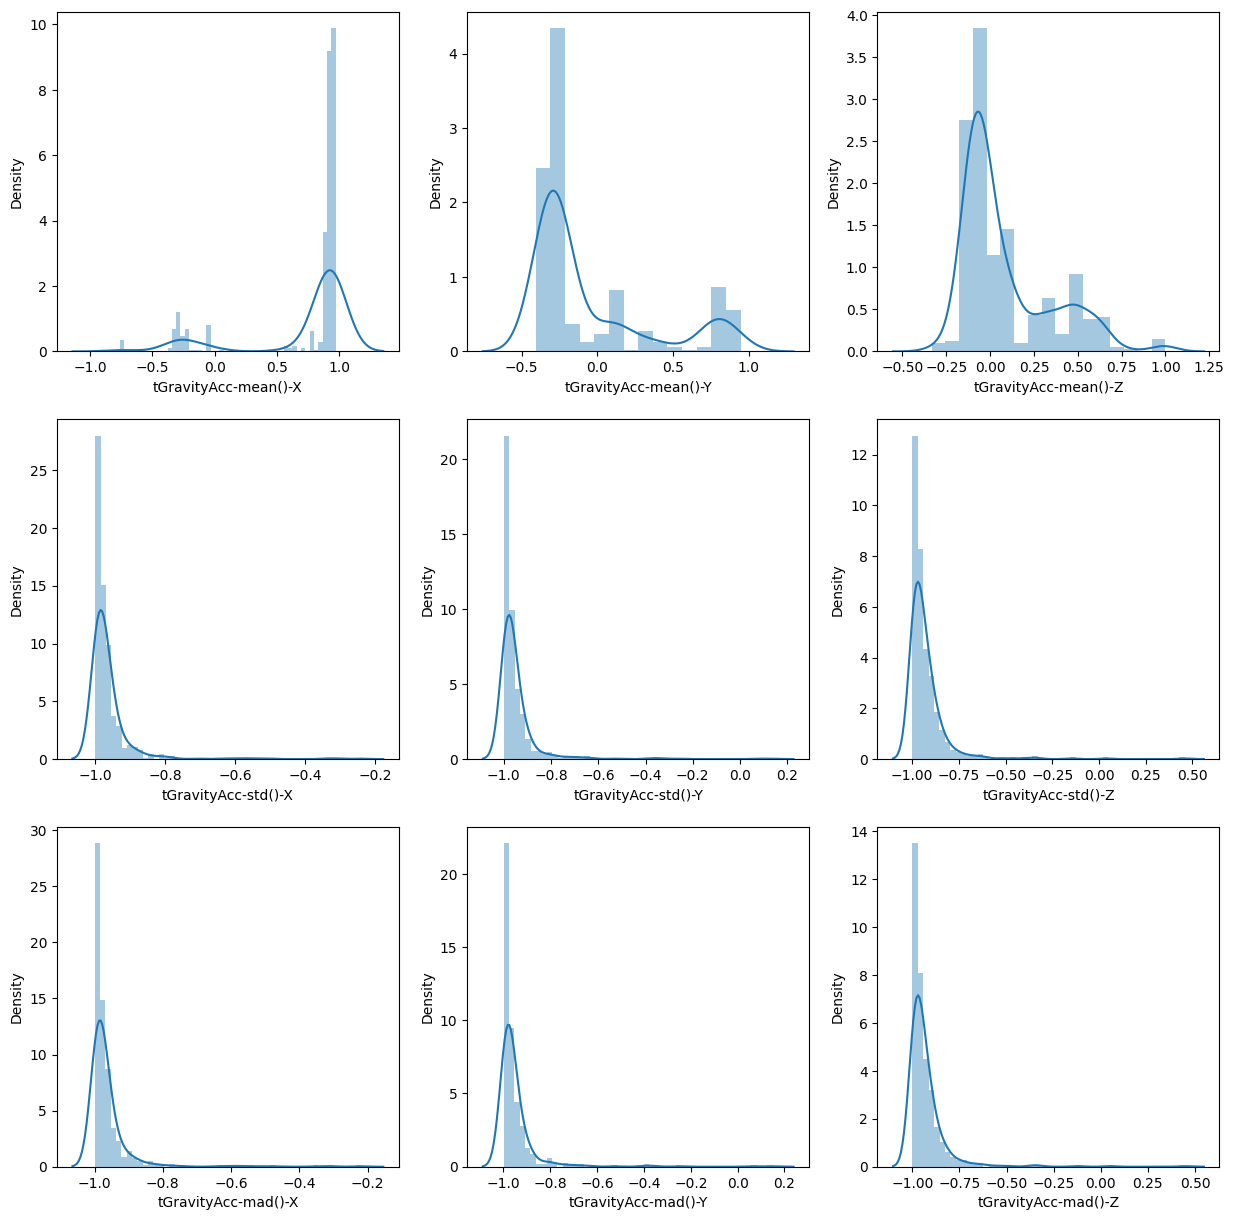

In [42]:

# Select gravity body acceleration attributes for  time series data of X, Y, Z axis
cols = both_df.columns[40:49]
plot_distribution(both_df, cols)

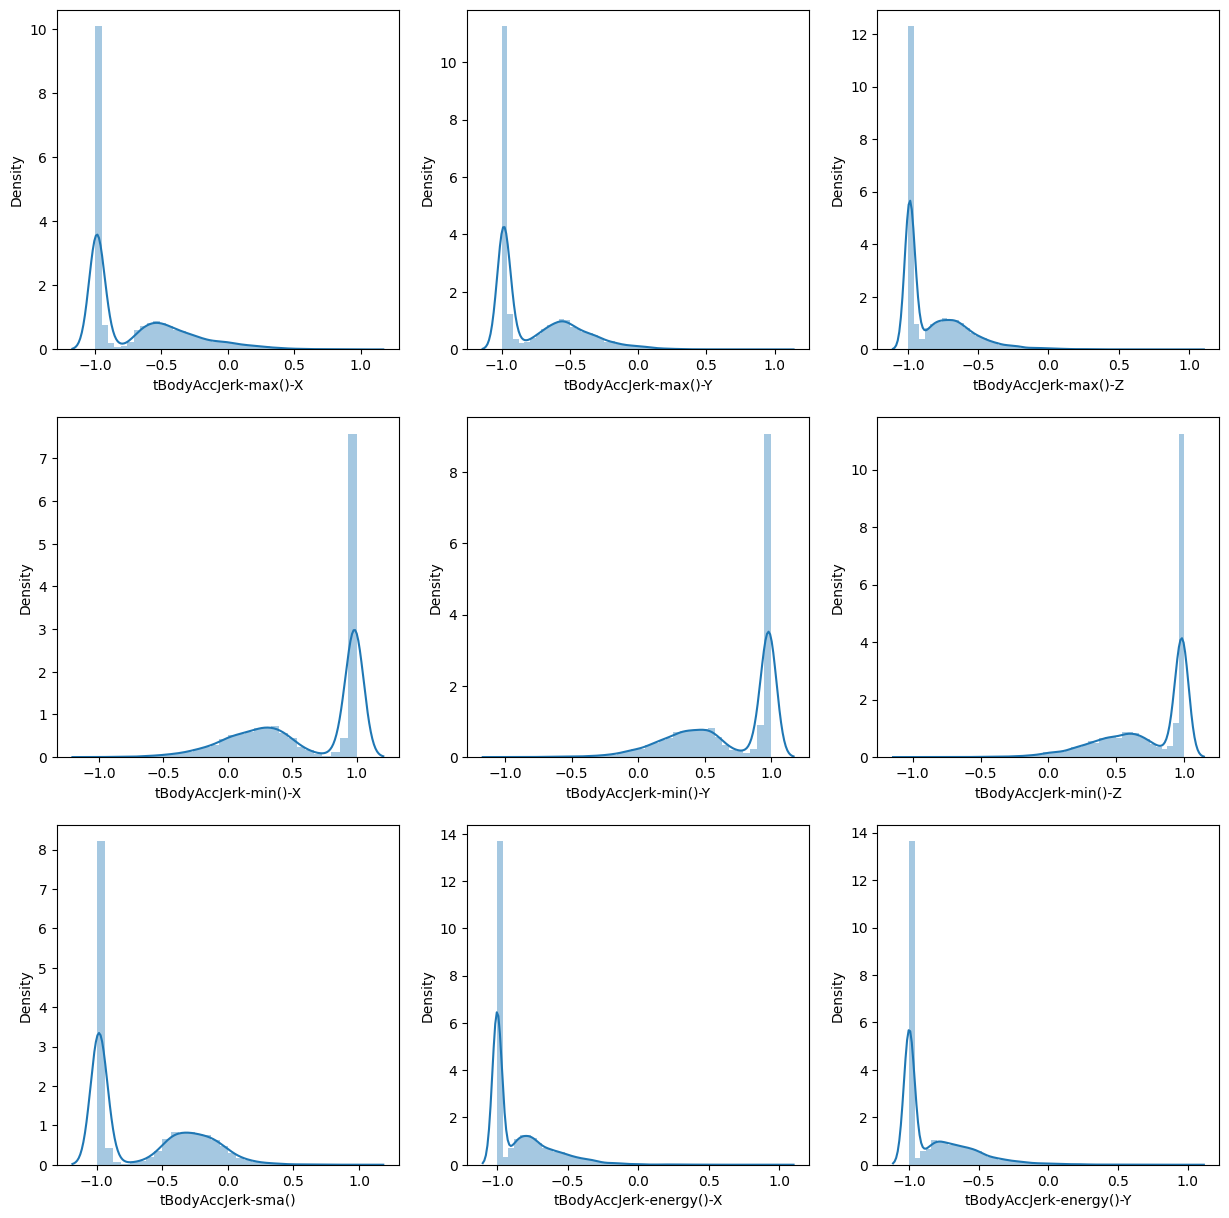

In [ ]:
 # Select jerk body acceleration attributes for  time series data of X, Y, Z axis
cols = both_df.columns[89:98]
plot_distribution(both_df, cols)

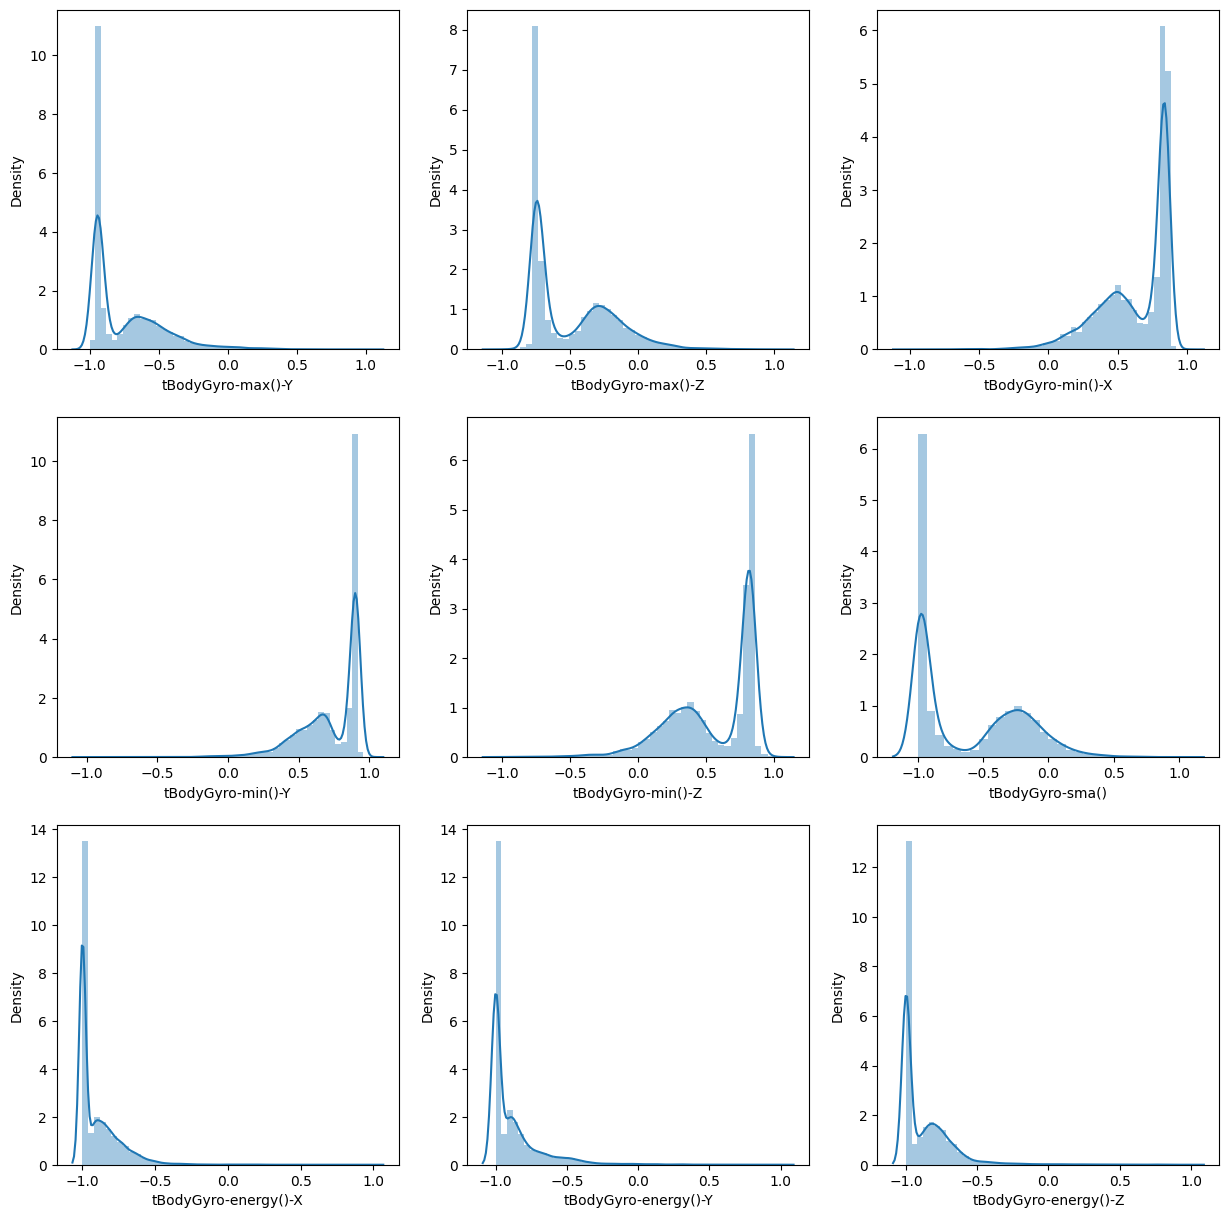

In [ ]:
# Select gyro body attributes for time series data of X, Y, Z axis
cols = both_df.columns[130:139]
plot_distribution(both_df, cols)

In [ ]:
#Create pipeline for Logistric Regression model
log_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression())
    ]
)
log_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [ ]:
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__multi_class' : ['multinomial'],
    'logreg__solver': ['newton-cg', 'saga','sag']
}

grid = GridSearchCV(log_pipe, param_grid, cv=5)
grid_log = grid.fit(X_train, y_train)

print('Parameters')
print(grid_log.best_params_)
print('')
print('Best Testing Score')
print(grid_log.best_score_)
print('')
print('Best Training Score')
print(grid_log.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_log.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_log.cv_results_['mean_fit_time'].mean())

Parameters
{'logreg__C': 1, 'logreg__multi_class': 'multinomial', 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}

Best Testing Score
0.9946666666666667

Best Training Score
1.0

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1, multi_class='multinomial',
                                    penalty='l1', solver='saga'))])

Avg Fit Time
0.5253414710362752


In [ ]:
#Create pipeline for Guassian NB model
gnb_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('gnb', GaussianNB())
    ]
)
gnb_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('gnb', GaussianNB())])

In [ ]:
param_grid = {
        'gnb__priors': [None],
        'gnb__var_smoothing' : [0.00000001, 0.000000001, 0.00000001]
}

grid = GridSearchCV(gnb_pipe, param_grid, cv=5)
grid_gnb = grid.fit(X_train, y_train)

print('Parameters')
print(grid_gnb.best_params_)
print('')
print('Best Testing Score')
print(grid_gnb.best_score_)
print('')
print('Best Training Score')
print(grid_gnb.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_gnb.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_gnb.cv_results_['mean_fit_time'].mean())

Parameters
{'gnb__priors': None, 'gnb__var_smoothing': 1e-08}

Best Testing Score
0.8800000000000001

Best Training Score
0.9066666666666666

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('gnb', GaussianNB(var_smoothing=1e-08))])

Avg Fit Time
0.018557151158650715


In [ ]:
#Create pipeline for KNN model
knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)
knn_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
k_range = list(range(1,51,2))
leaf_range = list(range(1,31,2))
param_grid = {
    'knn__n_neighbors' : k_range,
    'knn__leaf_size' : leaf_range,
    'knn__weights' : ['uniform', 'distance']
}

grid = GridSearchCV(knn_pipe, param_grid)
grid_knn = grid.fit(X_train, y_train)

print('Parameters')
print(grid_knn.best_params_)
print('')
print('Best Testing Score')
print(grid_knn.best_score_)
print('')
print('Best Training Score')
print(grid_knn.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_knn.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_knn.cv_results_['mean_fit_time'].mean())

Parameters
{'knn__leaf_size': 1, 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

Best Testing Score
0.96

Best Training Score
1.0

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=1, n_neighbors=1))])

Avg Fit Time
0.018923301506042482


In [ ]:
#Create pipeline for SVC model
svm_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True))
    ]
)
svm_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [ ]:
param_grid = {
              'svm__C': [0.1, 1, 10, 100, 1000],
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svm__kernel': ['rbf','poly','sigmoid']
              }

grid = GridSearchCV(svm_pipe, param_grid)
grid_svm = grid.fit(X_train, y_train)

print('Parameters')
print(grid_svm.best_params_)
print('')
print('Best Testing Score')
print(grid_svm.best_score_)
print('')
print('Best Training Score')
print(grid_svm.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_svm.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_svm.cv_results_['mean_fit_time'].mean())

Parameters
{'svm__C': 100, 'svm__gamma': 0.0001, 'svm__kernel': 'sigmoid'}

Best Testing Score
0.9946666666666667

Best Training Score
1.0

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=100, gamma=0.0001, kernel='sigmoid', probability=True))])

Avg Fit Time
0.11895427385965983


In [ ]:
results_log=cross_validate(log_pipe, X_train, y_train, return_train_score=True)
results_svm=cross_validate(svm_pipe, X_train, y_train, return_train_score=True)
results_knn=cross_validate(knn_pipe, X_train, y_train, return_train_score=True)
results_gnb=cross_validate(gnb_pipe, X_train, y_train, return_train_score=True)

In [ ]:
comp = ({
    'model':['Logistic Regression','SVM','kNN','GuassianNB'],
    'test score' :[grid_log.best_score_,grid_svm.best_score_,grid_knn.best_score_,grid_gnb.best_score_],
    'training score' :[grid_log.score(X_train, y_train),grid_svm.score(X_train, y_train),grid_knn.score(X_train, y_train),grid_gnb.score(X_train, y_train)],
    'average fit time':[results_log['fit_time'].mean(),results_svm['fit_time'].mean(),results_knn['fit_time'].mean(),results_gnb['fit_time'].mean()]
               })
pd.set_option('display.float_format', '{:.6f}'.format)
comp_df = pd.DataFrame(comp)
print(comp_df)

                 model  test score  training score  average fit time
0  Logistic Regression    0.994667        1.000000          0.406454
1                  SVM    0.994667        1.000000          0.177861
2                  kNN    0.960000        1.000000          0.016438
3           GuassianNB    0.880000        0.906667          0.017223


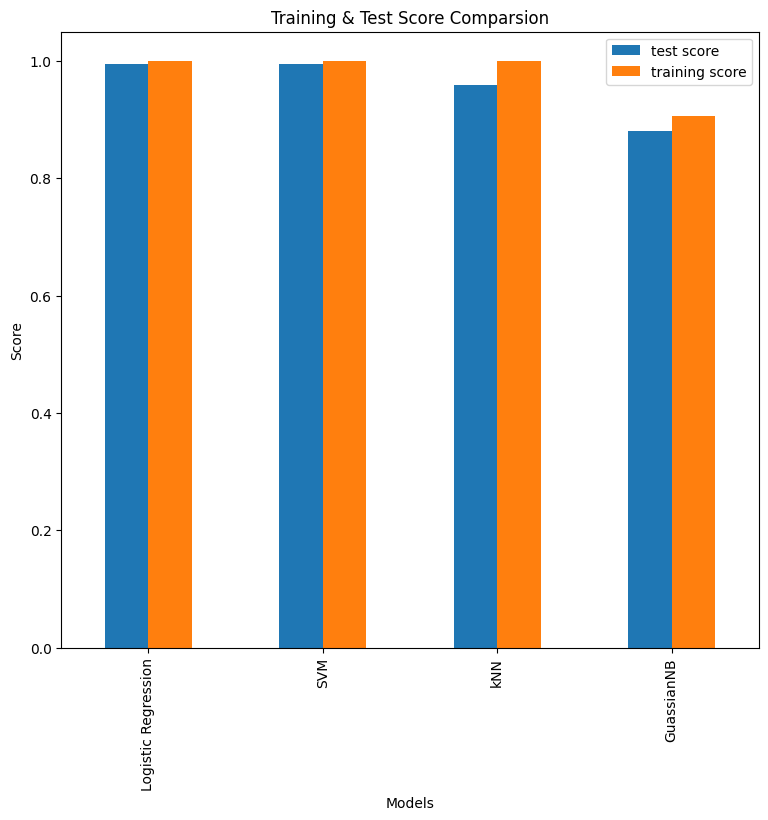

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(comp_df, columns=['model','test score', 'training score'])
df.plot(x='model', y=['test score', 'training score'], kind="bar", figsize=(9, 8))
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Training & Test Score Comparsion")
plt.legend(['test score', 'training score'])
plt.show()

In [ ]:
accdf=both_df.filter(['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','Activity','subject'])

accdf

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,Activity,subject
0,0.288585,-0.020294,-0.132905,STANDING,#1
1,0.278419,-0.016411,-0.123520,STANDING,#1
2,0.279653,-0.019467,-0.113462,STANDING,#1
3,0.279174,-0.026201,-0.123283,STANDING,#1
4,0.276629,-0.016570,-0.115362,STANDING,#1
...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,WALKING_UPSTAIRS,#24
10295,0.363385,-0.039214,-0.105915,WALKING_UPSTAIRS,#24
10296,0.349966,0.030077,-0.115788,WALKING_UPSTAIRS,#24
10297,0.237594,0.018467,-0.096499,WALKING_UPSTAIRS,#24
